# Objectives



* To explore transfer learning from Week 9 lecture and apply it in pistachio image classification.
> **Remember**: It is your responsibility as a machine learning scientist to read documentations for each library function in the code to thoroughly understand what it is doing, how it serves the purpose highlighted in the code comments, and other parameters that could be set.

# Section 1 - Load Pistachio Image dataset


1. <ins>Dataset information</ins>

This week, we will use the *Pistachio Image dataset*, which contains raw images and their labels.
>See the publication below for some info on the dataset:
  * OZKAN IA., KOKLU M. and SARACOGLU R. (2021). Classification of Pistachio Species Using Improved K-NN Classifier. Progress in Nutrition, Vol. 23, N. 2. https://doi.org/10.23751/pn.v23i2.9686.


2. <ins>Dataset download</ins>

You need to download the data before you can get started. Download from https://www.muratkoklu.com/datasets/. The link for the *Pistachio_Image_Dataset* is in the first table on the page.

3. <ins> Dataset upload</ins>

You would then have downloaded a *Pistachio_Image_Dataset.zip* file. This file can be uploaded to your Colab directory using the File menu in Google Colab. Once upload is complete, you should be able to see the file on the listed contents of your Colab directory.

4. <ins> Dataset folder structure</ins>

The folder has three sets of data (and so, three subfolders):

* Pistachio_Image_Dataset - containing image data as jpg files split between two folders named with the classification label of interest.

* Pistachio_16_Features_Dataset - containing 16 hand-crafted (i.e. engineered) features extracted from the image data, represented as a feature vector and labels provided in different file formats including xls.
>Read about the 16 features here: https://www.researchgate.net/profile/Ridvan-Saracoglu/publication/353121533_Classification_of_Pistachio_Species_Using_Improved_k-NN_Classifier/links/60e8213930e8e50c01f0e73f/Classification-of-Pistachio-Species-Using-Improved-k-NN-Classifier.pdf

* Pistachio_28_Features_Dataset - containing 28 hand-crafted (i.e. engineered) features extracted from the image data, represented as a feature vector and labels provided in different file formats including xls. (It is not very clear what how the 28 features were extracted, but I expect that it includes the 16 features above.).

5. <ins> Loading the dataset</ins>

You can use the code below to unzip the folder (first code cell), load the hand-crafted features data, with labels (second code cell), and preload the raw image data with labels (third code cell).
>Only the path addresses of the images are loaded here ('pre-load') as loading all the images into memory at once would not be efficient on the memory.

>Note that the two data versions (hand-crafted features and image) are loaded such that they are matched for the same data instance. (At least there is an attempt to do so based on what is understood of the data arrangement.)

>You may want to browse through the files yourself to see what they contain.


**Unzipping**

In [13]:
from zipfile import ZipFile

# specify the full path for the uploaded zipped dataset file
data_folder_full_path = "Pistachio_Image_Dataset.zip"


# load the zip file and create a zip object
with ZipFile(data_folder_full_path, 'r') as datasetFolderObject:

    # and then extracting the contents to the main directory
    datasetFolderObject.extractall(path="")

# lists the content of your main Colab directory
!ls  /Users/lukebirkett/Repos/study-planner/934G5_Machine_Learning/labs

Metadata_VARIABLES.xlsx
Pistachio_Image_Dataset
Pistachio_Image_Dataset.zip
README.md
Week 1.ipynb
Week 1_with solutions.ipynb
Week 2.ipynb
Week 2_assignments.ipynb
Week 2_with solutions.ipynb
Week 3.ipynb
Week 3_with solutions.ipynb
Week 4.ipynb
Week 4_assignments.ipynb
Week 4_with solutions.ipynb
Week 8.ipynb
Week 8_assignments.ipynb
Week 8_with solutions.ipynb
Week 9.ipynb
Week 9_with solutions.ipynb
Week 9_with solutions_Section 7.ipynb
curated_data_1month_2010-2022_nonans.csv
curated_data_24month_2010-2022_nonans.csv
ml_labs
notes


In [9]:
!pwd

/Users/lukebirkett/Repos/study-planner/934G5_Machine_Learning/labs


**Loading the *Pistachio_28_Features_Dataset* data**

In [20]:
import numpy
import pandas



# specify the full path for the unzipped xls file for the 28_features version
# of the dataset
feat_data_file_full_path = "Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls"

# load the data from the xls file
feat_28_data_pandas = pandas.read_excel(feat_data_file_full_path)
feat_28_data = feat_28_data_pandas.to_numpy()

# output the shape of the loaded data to the screen
print("\n The dataset has shape: "+str(feat_28_data.shape))


# get the features and the labels from the loaded data
# note that the label column is the last column of the file
feat_col = numpy.arange(0, feat_28_data.shape[1]-1)
label_col = feat_28_data.shape[1]-1

feats_28 = feat_28_data[:, feat_col]
labels = feat_28_data[:, label_col]

print("\n A peek at the 28-features dataset features: \n"+str(feats_28))
print("\n A peek at the 28-features dataset labels: \n"+str(labels))

# recode the nominal labels as numeric
numpy.place(labels, labels=='Kirmizi_Pistachio', '0')
numpy.place(labels, labels=='Siirt_Pistachio', '1')
print("\n The recoded labels: ", str(numpy.unique(labels)))

# convert from string type to integer type
labels = labels.astype(int)
print("\n A peek at the recoded 28-features dataset labels: \n"+str(labels))



 The dataset has shape: (2148, 29)

 A peek at the 28-features dataset features: 
[[63391 1568.405 390.3396 ... 2.9692 3.0576 2.9542]
 [68358 1942.187 410.8594 ... 1.9807 2.1006 2.2152]
 [73589 1246.538 452.363 ... 3.542 3.6856 4.1012]
 ...
 [101136 1255.619 475.2161 ... 3.3112 3.4306 3.0697]
 [97409 1195.215 452.1823 ... 3.4237 2.9606 3.0033]
 [78466 2356.908 445.9131 ... 2.5278 2.2248 2.448]]

 A peek at the 28-features dataset labels: 
['Kirmizi_Pistachio' 'Kirmizi_Pistachio' 'Kirmizi_Pistachio' ...
 'Siirt_Pistachio' 'Siirt_Pistachio' 'Siirt_Pistachio']

 The recoded labels:  ['0' '1']

 A peek at the recoded 28-features dataset labels: 
[0 0 0 ... 1 1 1]


**Pre-load the *Pistachio_Image_Dataset* data**


 Check:
Number of images preloaded: 2148
Number of unique instance ids for the images: (2148,)
Number of labels loaded: (2148,)

Image shape: torch.Size([3, 600, 600])


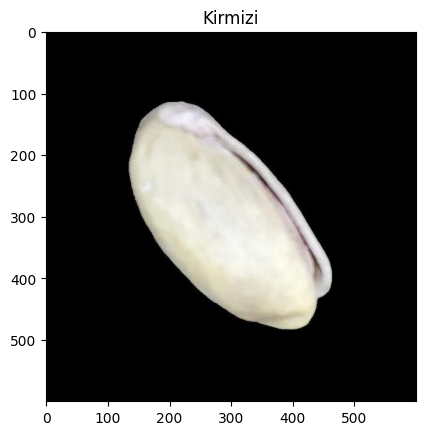


Image shape: torch.Size([3, 600, 600])


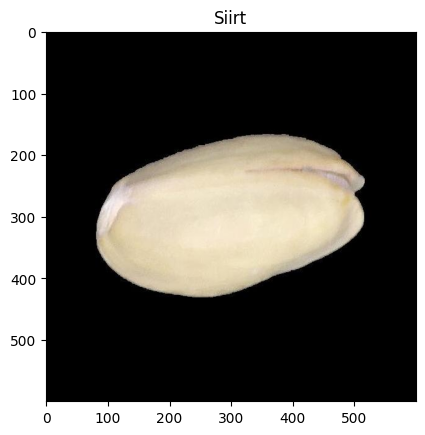

In [25]:
import os
from torchvision.io.image import read_image
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

random_seed = 1

# specify the full path for the folders containing
# the image version of the dataset
image_source_dir_kirmizi = "Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio"
image_source_dir_siirt = "Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio"


# create a method for getting the path addresses for the (image) contents
# of the image source folders
# as we also want to relate the image instances to the data instances (rows)
# in the hand-crafted features version of the dataset, we also need to get
# the instance id in the file names of the images.
# (assuming that the row number corresponds to the matching instance id
# for the hand-crafted features version of the dataset)
#
# NOTE that some filenames have the instance id repeated in bracket
# for another instance, so we need to address that.
def get_filepaths(image_source_dir, num_id_bracketed, limit=0):
  image_files = []
  instance_ids = []
  count_instances = limit

  # Loop through all the files in the given folder
  # and get the full filepath for each file
  # and also get the corresponding instance id from its filename.
  #
  # We need to account for the ids repeated in brackets
  # (see NOTE above),
  # in order to get unique ids. For the sake of this lab,
  # we will assume that the instances with the bracketed ids
  # are earlier instances than instances without brackets
  # i.e. (1), (2) are earlier than 1, for example
  for filename in os.listdir(image_source_dir):
    image_files.append(os.path.join(image_source_dir, filename))

    instance = filename.split(' ')
    #print(instance)
    instance = instance[1].split('.')
    #print(instance)
    instance = instance[0]
    #print(instance)
    if instance[0]=='(':
      instance = instance[1:]
      instance = instance[:len(instance)-1]
      instance = int(instance)
    else:
      instance = int(instance)+num_id_bracketed
    #print(instance)
    instance_ids.append(instance-1+limit)

    count_instances += 1

  return image_files, instance_ids, count_instances


# call the above method to get the path address for each image in the folders
#
# Since the Kirmizi instances appear as the first rows in the hand-crafted features
# version of the dataset, we start the instance id ordering from the folder for this label.
#
# Remember that we want to be able to match instances in the hand-crafted features data
# with instances in the raw image data.
image_files_kirmizi, instance_ids_kirmizi, count_instances_kirmizi = get_filepaths(image_source_dir_kirmizi, num_id_bracketed=65)
# Since the Siirt instances appear as the last rows in the hand-crafted features*,
# version of the dataset, we continue the instance id ordering based on the count
# of instances in the Kirmizi folder
image_files_siirt, instance_ids_siirt, _ = get_filepaths(image_source_dir_siirt, num_id_bracketed=50, limit=count_instances_kirmizi)
# parameter values 50 and 65 above correspond to the number of image files
# with brackets in their instance ids
# so in essence, the non-bracketed ids are shifted by those numbers
# to make sure that ids are unique numbers (when brackets are removed)


# combine the lists of files for both image source folders
image_files = []
image_files.extend(image_files_kirmizi)
image_files.extend(image_files_siirt)


# combine the list of instance ids for both image source folders
# the ids are needed to match with the hand-crafted features data
image_instance_ids = []
image_instance_ids.extend(instance_ids_kirmizi)
image_instance_ids.extend(instance_ids_siirt)

# print("\n A peek at the image files: \n"+str(image_files))
# print("\n A peek at the instance ids: \n"+str(image_instance_ids))


# double-check that instance ids are indeed unique
# if true, the number of unique instance ids should match
# the number of instances in the hand-crafted features data
print('\n Check:')
print('Number of images preloaded:', len(image_instance_ids))
print('Number of unique instance ids for the images:', numpy.unique(numpy.array(image_instance_ids)).shape)
print('Number of labels loaded:', labels.shape)


# method to visualize sample images
def plot_image(img_file, img_name):

  print()
  img = read_image(img_file)
  print('Image shape:', img.size())
  pil_img = to_pil_image(img)
  plt.figure()
  plt.imshow(numpy.asarray(pil_img))
  plt.title(img_name)
  plt.show()



# for a peek, randomly select one example from the kirmizi class to visualize
rng =  numpy.random.default_rng(random_seed)
kirmizi_id = rng.choice(instance_ids_kirmizi)
# for a peek, randomly select one example from the siirt class to visualize
siirt_id = rng.choice(instance_ids_siirt)


plot_image(image_files[kirmizi_id], 'Kirmizi')
plot_image(image_files[siirt_id], 'Siirt')

# Section 2 - Split into training, validation, and test sets



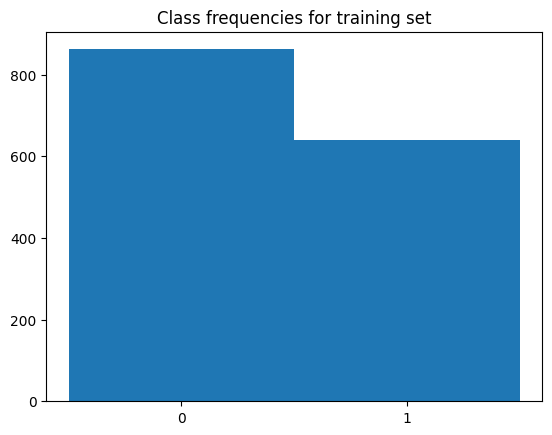

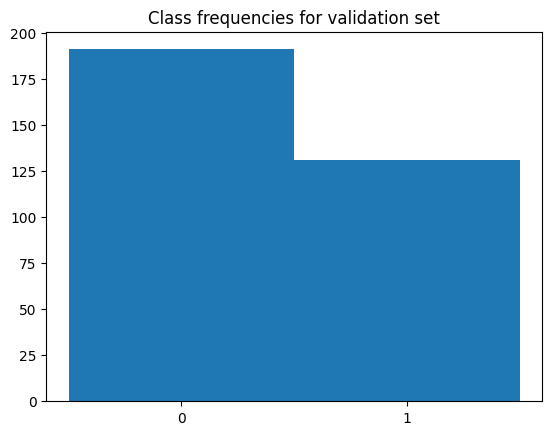

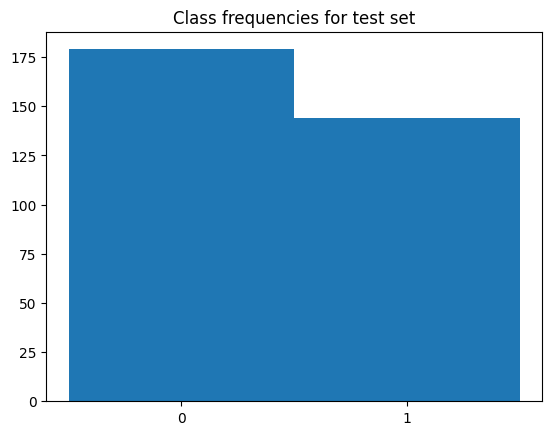

In [26]:
from sklearn.model_selection import train_test_split


all_ids = numpy.arange(0, feats_28.shape[0])

random_seed = 1

# First randomly split the data into 70:30 to get the training set
# split to have similar distributions of the class labels.
train_set_ids, rem_set_ids = train_test_split(all_ids, test_size=0.3, train_size=0.7,
                                 random_state=random_seed, shuffle=True, stratify=labels)


# Then further split the remaining data 50:50 into validation and test sets
# split to have similar distributions of the class labels.
val_set_ids, test_set_ids = train_test_split(rem_set_ids, test_size=0.5, train_size=0.5,
                                 random_state=random_seed, shuffle=True)


# create a method for a histogram plot
# that shows the distribution of each label class
# (classes '0' and '1' in this case)
# for a given set of label instances
def plot_label_distr(labels, plot_title):
  print()
  plt.figure()
  the_bin_centres = numpy.unique(labels)
  plt.hist(labels, bins=the_bin_centres.shape[0], range=(the_bin_centres[0]-0.5, the_bin_centres[the_bin_centres.shape[0]-1]+0.5))
  plt.xticks(the_bin_centres)
  plt.title(plot_title)
  plt.show()



# check the distribution of the labels in the training, validation, and test sets
plot_label_distr(labels[train_set_ids], 'Class frequencies for training set')
plot_label_distr(labels[val_set_ids], 'Class frequencies for validation set')
plot_label_distr(labels[test_set_ids], 'Class frequencies for test set')



# Section 3 - Scale (i.e. normalize) the hand-crafted features




In [ ]:
from sklearn.preprocessing import StandardScaler

# create a function for normalizing the feature vector
# using a standard scaling (results in mean=0 and standard deviation=1)
def scale_feats(feat_vec):
  # Scaling the features to the same range of values
  scaler = StandardScaler()
  scaler.fit(feat_vec)
  scaled_feat_vec = scaler.transform(feat_vec)
  print("\n A peek at the scaled dataset features: \n"+str(scaled_feat_vec))

  return scaled_feat_vec

# normalize the feature vector
scaled_feats_28 = scale_feats(feats_28)




 A peek at the scaled dataset features: 
[[-1.26229557  0.3793384  -1.72358958 ... -0.11555997  0.23737327
   0.01817042]
 [-0.88367525  1.3748213  -1.09099947 ... -1.46261734 -1.23215144
  -0.96716768]
 [-0.48493096 -0.47788077  0.18848508 ...  0.66501106  1.20170087
   1.54751115]
 ...
 [ 1.61489872 -0.45369561  0.89300681 ...  0.35049326  0.81013473
   0.17217116]
 [ 1.33080009 -0.61456785  0.18291441 ...  0.50380025  0.08842458
   0.0836374 ]
 [-0.11317108  2.47933587 -0.01035424 ... -0.71706844 -1.04143569
  -0.65676618]]


# Section 4 - Extract new (transfer learning) features using a pre-trained model

We will use a pre-trained *VGG-16* model. The VGG-16 is a 16-layer convolutional neural network (CNN).
>Have a look at the basic details of the model here: https://pytorch.org/vision/stable/models/generated/torchvision.models.vgg16.html#torchvision.models.vgg16.

>You can read more about the VGG-16 model architecture here: https://arxiv.org/abs/1409.1556.

>From the documentation and publication, note:
  * the number of parameters (weights) that the model has
  * the dataset that it was trained on (You can read more about the dataset here: https://www.image-net.org/)
  * the different kinds of objects etc that it was trained to differentiate, i.e. its classes

In [27]:
from enum import auto
from torchvision.io import read_image
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler

# load and view the VGG16 model
model_vgg16 = models.vgg16()
print("\n 'View' the model architecture:\n")
print(model_vgg16)


# Extract features using the feature extraction layers of the pretrained model

### Step 1: Initialize model with the best available weights
model_vgg16_featlayers = models.vgg16(weights="IMAGENET1K_FEATURES").features
model_vgg16_featlayers.eval()


### Step 2: Initialize the inference transforms
# This does some preprocessing behind the scenes, including:
# 1) Resizing the input to resize_size=[256];
# 2) Followed by a central cropping of crop_size=[224];
# 3) And finally the values are first rescaled to [0.0, 1.0]
# and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].
# The transform function expects either:
# a batched (B, C, H, W) or single (C, H, W) image, as torch.Tensor objects.
preprocess = models.VGG16_Weights.IMAGENET1K_FEATURES.transforms(antialias=True)



# method to get features learnt in the pretrained VGG16
# extracting these features for our own list of images
def get_img_feats(img_path):


  img = read_image(img_path)
  #print("Fetching image...")

  # Step 3: Apply the preprocessing transforms
  batch = preprocess(img).unsqueeze(0)

  # Step 4: Use the feature extraction layers of the pretrained model
  # to obtain the features
  auto_feats = model_vgg16_featlayers(batch).squeeze(0)
  auto_feats = auto_feats.detach().numpy()
  auto_feats = numpy.mean(auto_feats, axis=1, keepdims=False)
  auto_feats = numpy.mean(auto_feats, axis=1, keepdims=False)

  return auto_feats





 'View' the model architecture:

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=

100.0%


# Section 5 - Train a MLP using the new (transfer learning) features

* Train and evaluate a MLP for classifying pistachio images into the two classes based on the new features extracted using the VGG-16

**Solution**

In [28]:
import torch
from torch import nn
from torch.nn import functional as F
from typing import Callable
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from copy import deepcopy
import random



### Create the methods to be used

# Create the neural network structure
# for a 3-layer MLP
class three_layer_MLP(nn.Module):
    def __init__(self,
                 input_size,
                 hidden_layer_sizes,
                 output_size):
        super().__init__()
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], output_size)


    def forward(self, inputs):
        out = self.hidden_l1(inputs)
        out = self.hidden_l2(out)
        out = self.output_l3(out)
        out = torch.softmax(out, 1)
        return out


# A method for computing performance metrics of interest
def my_metrics(labels, predictions, show_confusion_matrix=False):

    ## First work out which class has been predicted for each data sample.
    ## Finally return the classification performance
    predictions_numpy = predictions.detach().numpy()
    predicted_classes = numpy.argmax(predictions_numpy, axis=1)
    f1_scores = f1_score(labels, predicted_classes, average=None)
    acc = accuracy_score(labels, predicted_classes)

    if show_confusion_matrix:
      print("\n Confusion matrix:")
      confus_mat = confusion_matrix(labels, predicted_classes)
      disp = ConfusionMatrixDisplay(confus_mat)
      disp.plot()
      plt.show()

    return numpy.mean(f1_scores), acc



# A method for training a given model
def train_model(model, learning_rate, epochs, train_dataloader, val_dataloader):

  # The optimizer we'll use to update the model parameters
  # SGD = Stochastic Gradient Descent
  # (See https://pytorch.org/docs/stable/optim.html for other types
  # implemented in the PyTorch library)
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  # To compute the loss against the true labels based on CrossEntropy loss.
  #(See https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
  # for the label format that the PyTorch method expects
  loss_function = nn.CrossEntropyLoss()

  # Set the model to training mode
  model.train()

  best_model_acc = 0
  losses = []

  # Iterate over the dataset a number of times.
  # Each iteration of the entire dataset is called an epoch.
  for epoch in range(0, num_epochs):


      if epoch == 0:  best_model = deepcopy(model)


      for batch, (X_train, y_train) in enumerate(train_dataloader):

        #print("I'm in training")


        # Feed forward of the model input
        train_pred = model.forward(X_train)
        # Training loss computation
        train_loss = loss_function(train_pred, y_train)
        # Performance computation for the training set
        train_avg_f1_score, train_acc = my_metrics(y_train, train_pred)



        # `.grad` buffers need to be zeroed out
        # as otherwise on the backward pass we'll add the
        # new gradients to the old ones.
        optimizer.zero_grad()

        # Compute the model parameters' gradients
        # and propagate the loss backwards through the network.
        train_loss.backward()

        # Now we update the model parameters using those gradients
        optimizer.step()

      # Compute the performance for the validation set
      for batch, (X_val, y_val) in enumerate(val_dataloader):
        val_pred = model.forward(X_val)
        val_loss = loss_function(val_pred, y_val)
        val_avg_f1_score, val_acc = my_metrics(y_val, val_pred)

      # If the current model performance
      # is better than the previous
      # 'save' the current model
      # toward early stopping
      if val_acc > best_model_acc:
        best_model_acc = val_acc
        best_model = deepcopy(model)
        print('Found improvement in performance. New model saved.')

      # How well the network does on the batch is an indication
      # of how well training is progressing
      print("epoch: {} - train loss: {:5.5f} train acc: {:2.2f} val loss: {:5.5f} val acc: {:2.2f}".format(
          epoch,
          train_loss.item(),
          train_acc,
          val_loss.item(),
          val_acc

      ))

      losses.append([train_loss.item(), val_loss.item()])



  # 'Early stopping' - instead of using the model weights from the last epoch
  # use the model weights from the best performance on the validation set
  model = best_model

  return model, losses




def evaluate_model(model, losses, test_dataloader):

  label_types = ['kirmizi', 'siirt']

  # test the model on the test set and get an estimate of its performance.
  # First set the model to evaluation mode
  model.eval()
  for batch, (X_test, y_test) in enumerate(test_dataloader):
    test_pred = model.forward(X_test)
    test_avg_f1_score, test_accuracy = my_metrics(y_test, test_pred)
    print("\n test f1 score: {:1.2f} | test accuracy: {:2.2f}".format(test_avg_f1_score, test_accuracy))
    test_pred_numpy = test_pred.detach().numpy()
    test_f1_scores = f1_score(y_test, numpy.argmax(test_pred_numpy, axis=1), average=None)
    print('\n The F1 scores for each of the classes are: '+str(test_f1_scores))


    print("\n Confusion matrix:")
    confusion_mat = confusion_matrix(y_test, numpy.argmax(test_pred_numpy, axis=1))
    disp = ConfusionMatrixDisplay(confusion_mat, display_labels=label_types)
    disp.plot()
    plt.show()

    print("\n Loss:")
    fig, ax = plt.subplots()
    losses = numpy.array(losses)
    ax.plot(losses[:, 0], 'k-', label='training loss')
    ax.plot(losses[:, 1], 'b-', label='validation loss')
    plt.legend(loc='upper right')




# A class for managing the data for training the model
# based on the features extracted using the pretrained model
class AutoFeatsDataset(Dataset):
    def __init__(self, img_files, labels):
        # Convert your features and labels from numpy arrays to PyTorch tensors
        self.image_files = img_files
        self.labels = torch.tensor(labels, dtype=torch.long)


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        # extract the features using the the pretrained model
        auto_feats = get_img_feats(self.image_files[idx])


        feats_tensor = torch.tensor(auto_feats, dtype=torch.float32)

        return feats_tensor, self.labels[idx]



 Batch size= 100
Learning rate= 0.05
Number of epochs= 5
Model=3-layer MLP
Feats=Pretrained VGG16 features

Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.48897 train acc: 0.67 val loss: 0.65718 val acc: 0.56
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.47256 train acc: 0.67 val loss: 0.53194 val acc: 0.78
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.32796 train acc: 1.00 val loss: 0.43582 val acc: 0.89
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.31889 train acc: 1.00 val loss: 0.41437 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.31636 train acc: 1.00 val loss: 0.40330 val acc: 0.92

 test f1 score: 0.89 | test accuracy: 0.89

 The F1 scores for each of the classes are: [0.90607735 0.88028169]

 Confusion matrix:


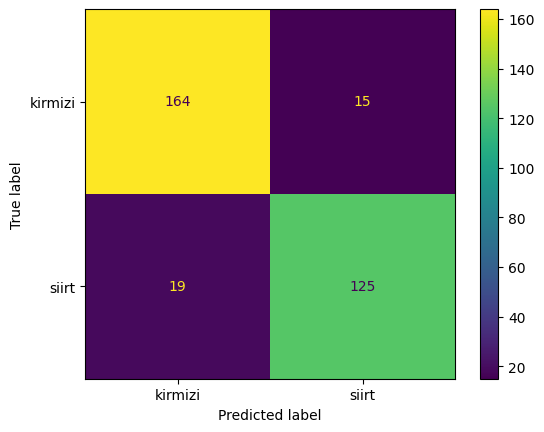


 Loss:


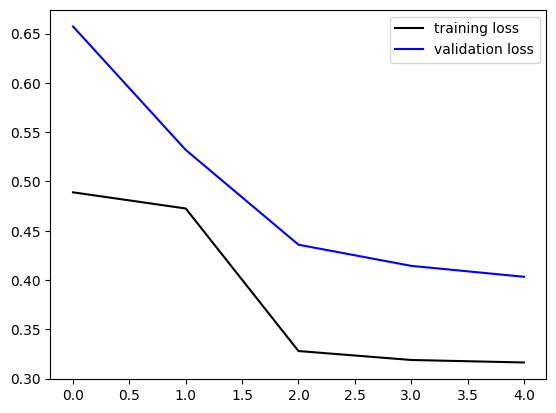

In [ ]:
# CAN TAKE ABOUT THREE HOURS
# The bottleneck is loading of the images


# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
numpy.random.seed(random_seed)

# Create an instance of your network
feature_count = 512
hidden_layer_sizes = [50, 10]
class_count = numpy.unique(labels).shape[0]
three_layer_MLP_model_vautofeats = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 5
learning_rate = 0.05
batch_size = 100

print('\n Batch size=', str(batch_size))
print('Learning rate=', str(learning_rate))
print('Number of epochs=', str(num_epochs))
print('Model=3-layer MLP')
print('Feats=Pretrained VGG16 features')
print()

# Set up the data loading by batch
# With the test and validation sets having only one batch
image_files_reordered = numpy.array([image_files[i] for i in image_instance_ids])


train_set_autofeats = AutoFeatsDataset(image_files_reordered[train_set_ids],
                             labels[train_set_ids])
train_dataloader_autofeats = DataLoader(train_set_autofeats, batch_size=batch_size)


val_set_autofeats = AutoFeatsDataset(image_files_reordered[val_set_ids],
                             labels[val_set_ids])
val_dataloader_autofeats = DataLoader(val_set_autofeats, batch_size=len(val_set_autofeats))


test_set_autofeats = AutoFeatsDataset(image_files_reordered[test_set_ids],
                             labels[test_set_ids])
test_dataloader_autofeats = DataLoader(test_set_autofeats, batch_size=len(test_set_autofeats))


# Train the model
three_layer_MLP_model_vautofeats, losses = train_model(three_layer_MLP_model_vautofeats,
                                                       learning_rate, num_epochs,
                                                       train_dataloader_autofeats, val_dataloader_autofeats)

# Evaluate the trained model
evaluate_model(three_layer_MLP_model_vautofeats, losses, test_dataloader_autofeats)




# Section 6 - Train a MLP using the hand-crafted features

* Train and evaluate a MLP for classifying pistachio images into the two classes based on the original hand-crafted features that came with the dataset.

* How does performance compare with that in Section 5?

**Solution**

In [ ]:
# A class for managing the data for training the model
# based on the hand-crafted features
class Feats28Dataset(Dataset):
    def __init__(self, feats, labels):
        # Convert your features and labels from numpy arrays to PyTorch tensors
        self.feats = torch.tensor(feats, dtype=torch.float32)

        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        return self.feats[idx, :], self.labels[idx]


 Batch size= 60

 Learning rate= 0.005

 Number of epochs= 30

 Model=3-layer MLP

 Feats=28 handcrafted features
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.58623 train acc: 1.00 val loss: 0.63798 val acc: 0.78
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.55965 train acc: 1.00 val loss: 0.60762 val acc: 0.82
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.53715 train acc: 1.00 val loss: 0.58422 val acc: 0.83
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.51797 train acc: 1.00 val loss: 0.56572 val acc: 0.84
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.50157 train acc: 1.00 val loss: 0.55077 val acc: 0.85
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.48752 train acc: 1.00 val loss: 0.53844 val acc: 0.86
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.47545 train acc: 1.00 val los

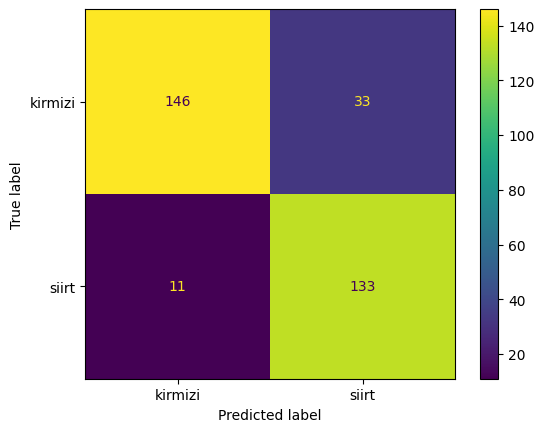


 Loss:


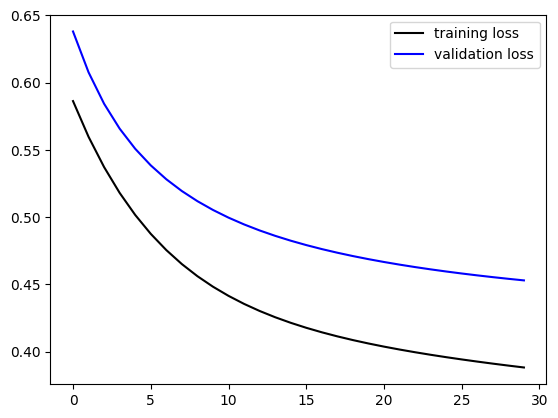

In [ ]:

# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
numpy.random.seed(random_seed)

# Create an instance of the network
feature_count = scaled_feats_28.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(labels).shape[0]
three_layer_MLP_model_vhandfeats = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 30
learning_rate = 0.005
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')
print('\n Feats=28 handcrafted features')

# Set up the data loading by batch
# With the test and validation sets having only one batch

train_set_handfeats = Feats28Dataset(scaled_feats_28[train_set_ids, :],
                             labels[train_set_ids])
train_dataloader_handfeats = DataLoader(train_set_handfeats, batch_size=batch_size)

val_set_handfeats = Feats28Dataset(scaled_feats_28[val_set_ids, :],
                             labels[val_set_ids])
val_dataloader_handfeats = DataLoader(val_set_handfeats, batch_size=len(val_set_handfeats))
test_set_handfeats = Feats28Dataset(scaled_feats_28[test_set_ids, :],
                             labels[test_set_ids])
test_dataloader_handfeats = DataLoader(test_set_handfeats, batch_size=len(test_set_handfeats))


# Train the model
three_layer_MLP_model_vhandfeats, losses = train_model(three_layer_MLP_model_vhandfeats,
                                                       learning_rate, num_epochs,
                                                       train_dataloader_handfeats, val_dataloader_handfeats)

# Evaluate the trained model
evaluate_model(three_layer_MLP_model_vhandfeats, losses, test_dataloader_handfeats)




# Section 7 - Together finetune the pretrained model (the feature extractor layers) and train the MLP classifier

Instead of simply using the pretrained VGG16 to extract features 'offline' and then using these features as input into the model training, one could combine the VGG16 (the feature extraction layers used in Section 4 - i.e. the convolution layers with their pretrained weights) and the (untrained) MLP classifier structure used in Sections 5 and 6 as a single model and train this new model. This is finetuning of the pretrained model, since the weights of the pretrained layers would now be updated.

* While the code below is set up to run this, it is expected to take a long time to run (on a regular computer), and it would have a large memory use given the batch size of 100 and the number of parameters (weights) even though the MLP classifier in the model is of a smaller size than the original VGG16. So, you are not expected to run the code below. Instead, read through the code to see how it differs from Sections 4 and 5 above.

* You could reduce the number weights in the first MLP layer (e.g. from 100 to 50) and the batch size (e.g. from 100 to 1) and try to run that. This will reduce the memory use for training the model. See the additional notebook on the Week 9 Canvas for this. Note that that notebook was run on a local computer (with 32GB RAM) and not on the free Google Colab.

* Note that if you wanted to use the VGG16 model as an encoder but without the pretrained weights (i.e. you wanted to train the encoder from scratch), you would need to remove the *weights="IMAGENET1K_FEATURES"* parameter in line 10 below.

In [ ]:
# Create the neural network structure
# for a 3-layer MLP
class VGG16pretrained_and_three_layer_MLP(nn.Module):
    def __init__(self,
                 input_size,
                 hidden_layer_sizes,
                 output_size):
        super().__init__()
        # Step 1: Initialize model with the best available weights
        self.pretrained = models.vgg16(weights="IMAGENET1K_FEATURES").features
        self.hidden_m1 = nn.AvgPool2d((7, 7), stride=(1, 1))
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], output_size)


    def forward(self, inputs):
        out = self.pretrained(inputs)
        out = self.hidden_m1(out)
        out = torch.reshape(out, (out.size(0), -1))
        out = self.hidden_l1(out)
        out = self.hidden_l2(out)
        out = self.output_l3(out)
        out = torch.softmax(out, 1)
        return out


# creating a function to get the image data
# and preprocess
def get_img(img_path):


  img = read_image(img_path)

  # Step 3: Applying the preprocessing transforms
  batch = preprocess(img).unsqueeze(0)

  return batch.squeeze(0).detach().numpy()


# A class for managing the data for training the model
# for the images
class ImageDataset(Dataset):
    def __init__(self, img_files, labels):
        # Convert your features and labels from numpy arrays to PyTorch tensors
        self.image_files = img_files
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        # load the image data
        img_data = get_img(self.image_files[idx])

        img_tensor = torch.tensor(img_data, dtype=torch.float32)

        return img_tensor, self.labels[idx]



In [ ]:
# CAN TAKE ABOUT THREE HOURS
# The bottleneck is loading of the images


# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
numpy.random.seed(random_seed)

# Creating an instance of the network
feature_count = 512
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(labels).shape[0]
VGG16pretrained_and_three_layer_MLP_model = VGG16pretrained_and_three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 10
learning_rate = 0.005
batch_size = 10

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=VGG 16 feature extraction layers (pretrained) & 3-layer MLP')
print('\n Feats=Raw images')

# Set up the data loading by batch
# With the test and validation sets having only one batch
image_files_reordered = numpy.array([image_files[i] for i in image_instance_ids])

train_set_vgg16_mlp = ImageDataset(image_files_reordered[train_set_ids],
                             labels[train_set_ids])
train_dataloader_vgg16_mlp = DataLoader(train_set_vgg16_mlp, batch_size=batch_size, num_workers=2)


val_set_vgg16_mlp = ImageDataset(image_files_reordered[val_set_ids],
                             labels[val_set_ids])
val_dataloader_vgg16_mlp = DataLoader(val_set_vgg16_mlp, batch_size=len(val_set_vgg16_mlp), num_workers=2)


test_set_vgg16_mlp = ImageDataset(image_files_reordered[test_set_ids],
                             labels[test_set_ids])
test_dataloader_vgg16_mlp = DataLoader(test_set_vgg16_mlp, batch_size=len(test_set_vgg16_mlp))


# Train the model
VGG16pretrained_and_three_layer_MLP_model, losses = train_model(VGG16pretrained_and_three_layer_MLP_model,
                                                                learning_rate, num_epochs,
                                                                train_dataloader_vgg16_mlp, val_dataloader_vgg16_mlp)

# Evaluate the trained model
evaluate_model(VGG16pretrained_and_three_layer_MLP_model, losses, test_dataloader_vgg16_mlp)


